To use PCA Algorithm for dimensionality reduction.
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.

 Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [2]:
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
df = pd.read_csv(url)

# Preview
print(df.head())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [3]:
# Assuming first column is class (1 = red, 2 = white wine or similar)
X = df.iloc[:, 1:]   # Features
y = df.iloc[:, 0]    # Wine type label


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Let's take first 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y


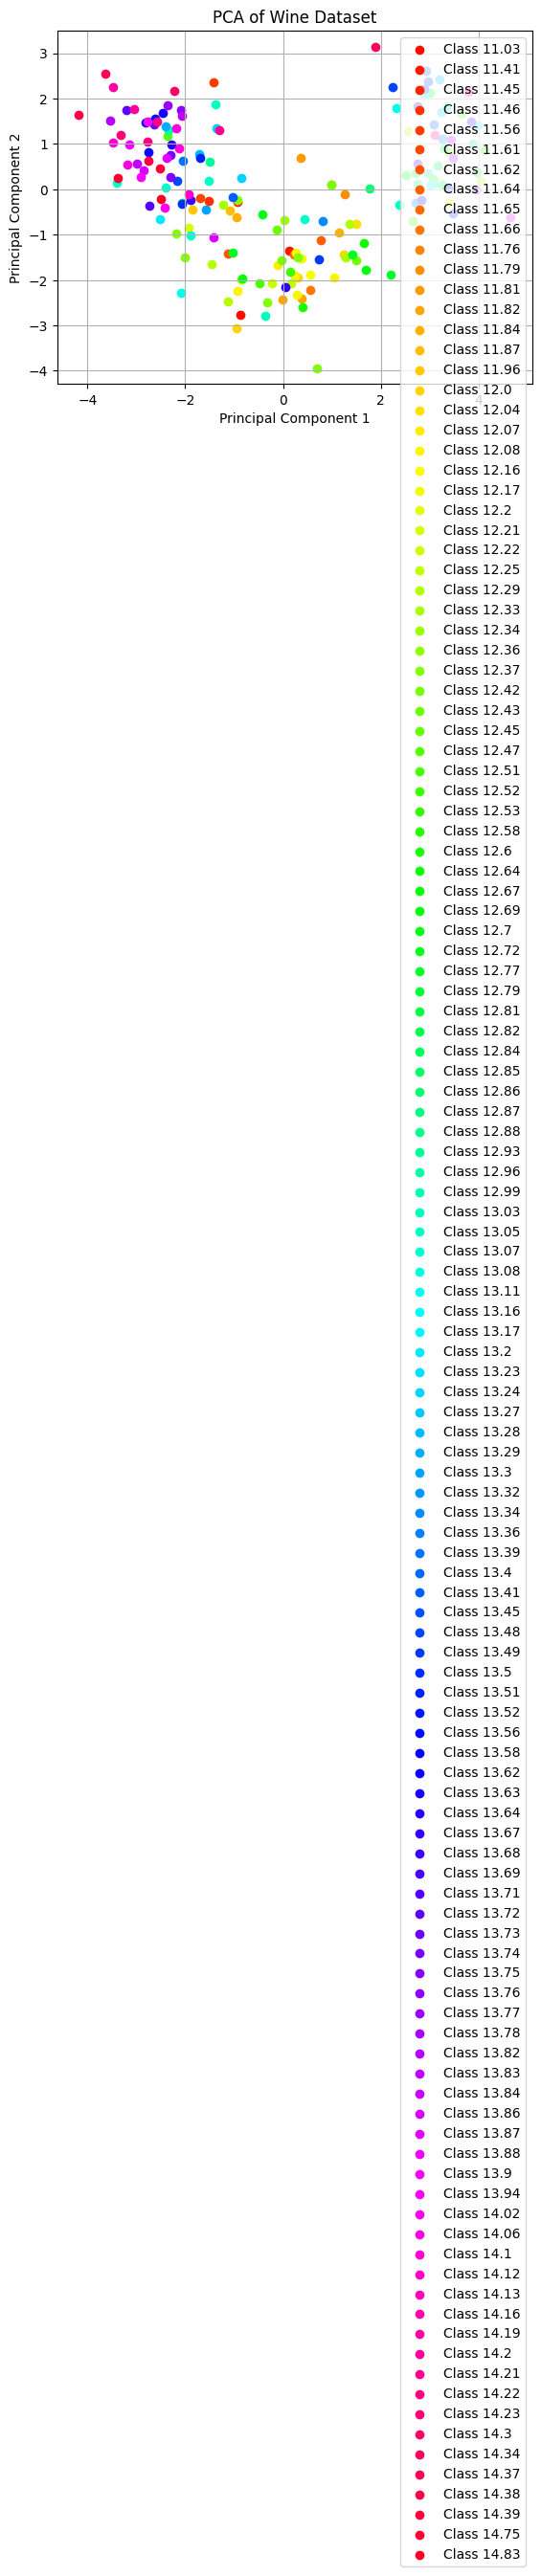

In [7]:
import seaborn as sns

# Generate a list of distinct colors using seaborn
labels = np.unique(y)
num_classes = len(labels)
colors = sns.color_palette("hsv", num_classes)  # You can also use 'tab10' or 'Set2'

for i, label in enumerate(labels):
    plt.scatter(
        pca_df[pca_df['Target'] == label]['PC1'],
        pca_df[pca_df['Target'] == label]['PC2'],
        color=colors[i],
        label=f'Class {label}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


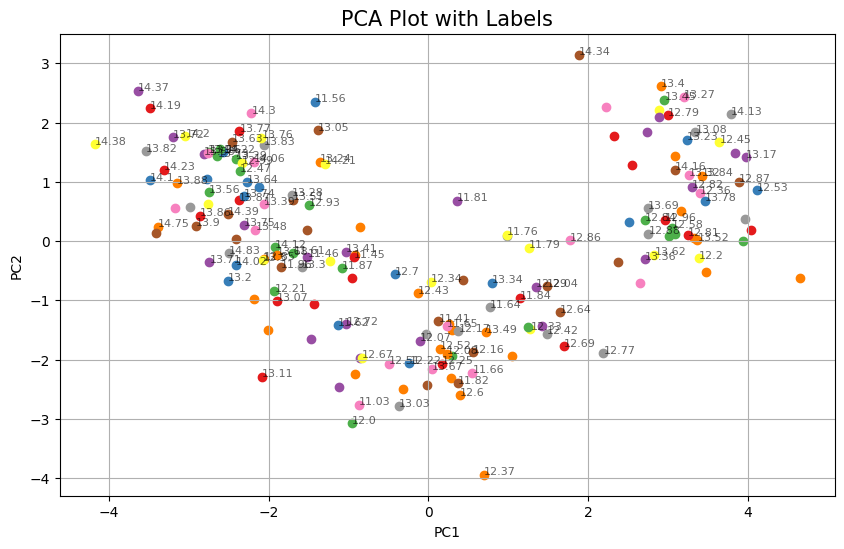

In [ ]:
#2 Optional -  Matplotlib with Annotations

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set1', len(pca_df['Target'].unique()))

for i, label in enumerate(pca_df['Target'].unique()):
    subset = pca_df[pca_df['Target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}', color=colors[i])

    # Annotate a few points for visibility
    for j in range(0, len(subset), 10):  # annotate every 10th point to avoid clutter
        plt.annotate(label,
                     (subset.iloc[j]['PC1'], subset.iloc[j]['PC2']),
                     fontsize=8, alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot with Labels', fontsize=15)
# plt.legend()
plt.grid(True)
plt.show()


C:\Users\Anil Abhange\AppData\Local\Temp\ipykernel_22064\2281472978.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Anil Abhange\AppData\Local\Temp\ipykernel_22064\2281472978.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Anil Abhange\AppData\Local\Temp\ipykernel_22064\2281472978.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Anil Abhange\AppData\Local\Temp\ipykernel_22064\2281472978.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Anil Abhange\AppData\Local\Temp\ipykernel_22064\2281472978.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance

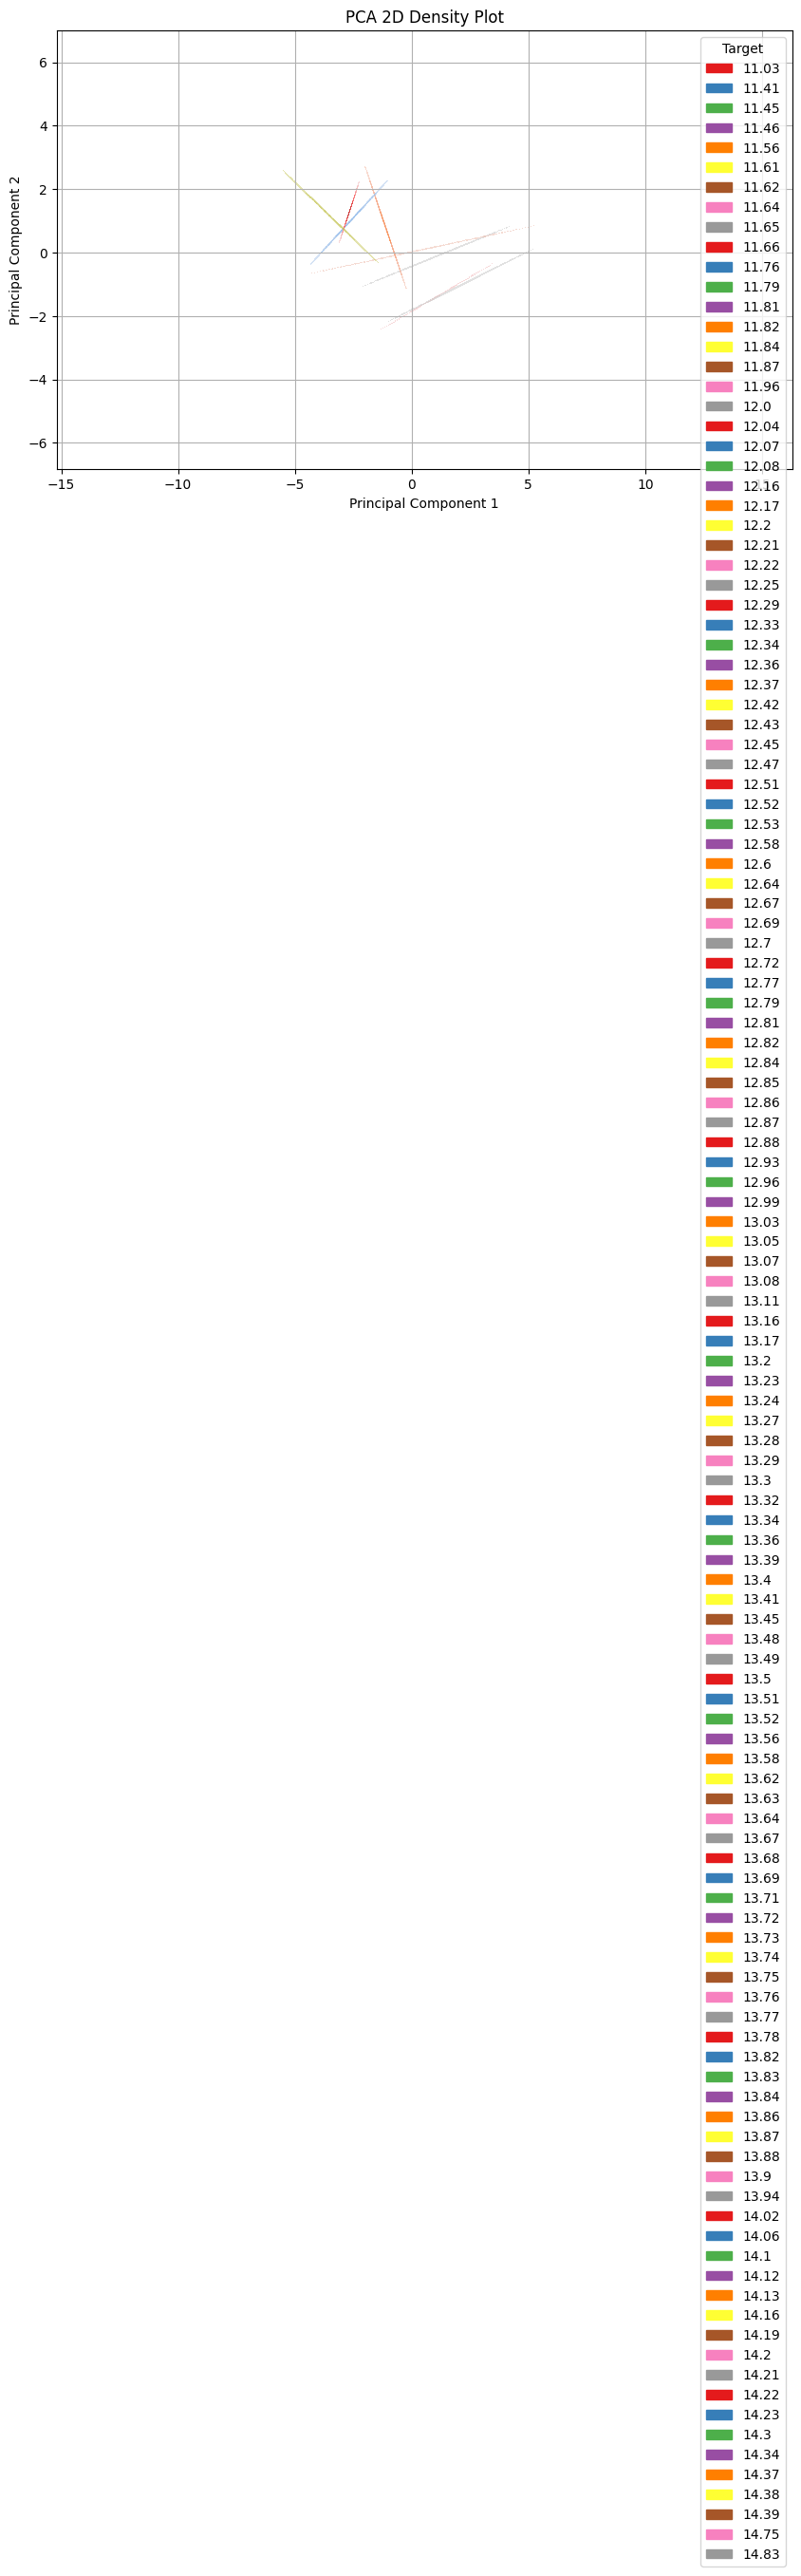

In [13]:
#  Option 3: 2D Density Plot (KDE)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Target",
    fill=True,
    alpha=0.5,
    palette="Set1"
)
plt.title('PCA 2D Density Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



In [8]:
print("Explained Variance Ratio of each PC:", pca.explained_variance_ratio_)
print("Total Variance Captured by 2 PCs:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio of each PC: [0.41957898 0.15585708]
Total Variance Captured by 2 PCs: 0.5754360666736625
